In [3]:
import torch
import matplotlib.pyplot as plt

torch.Size([200, 2])


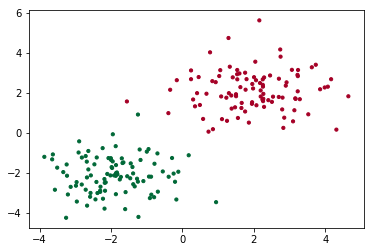

In [11]:
#生成随机数
n_data=torch.ones(100,2)
xy0=torch.normal(2*n_data,1)#生成均值为2,2 标准差为1的随机数组成的矩阵shape=(100,2)
c0=torch.zeros(100)

xy1=torch.normal(-2*n_data,1)#生成均值为-2，-2 标准差为1的随机数组成的矩阵shape=(100,2)
c1=torch.ones(100)

X=torch.cat((xy0,xy1),0)
c=torch.cat((c0,c1),0)
print(X.shape)

plt.scatter(X[:,0],X[:,1],c=c,s=10,cmap='RdYlGn')
plt.show()

In [19]:
#KMeans算法

class KMeans:
    def __init__(self,n_clusters=10,max_iter=None,verbose=True,device=torch.device('cpu')):
        self.n_clusters=n_clusters
        self.labels=None
        self.dists=None#各个样本点离聚类中心的距离，shape:[x.shape[0],n_clusters]
        self.centers=None
        self.variance=torch.Tensor([float('inf')]).to(device)
        self.verbose=verbose
        self.started=False
        self.max_iter=max_iter
        self.count=0
        self.device=device
        
    def fit_predict(self,x):
        #随机选择初始中心点
        init_row=torch.randint(0,x.shape[0],(self.n_clusters,)).to(self.device)# torch.randint(low=0, high, size,)
        init_points=x[init_row]
        self.centers=init_points
        
        while True:
            self.nearest_center(x)#聚类标记
            self.update_center(x)#更新中心点
            if self.verbose:
                print(self.variance,torch.argmin(self.dists,(0)))
            if (torch.abs(self.variance)<1e-3) and (self.max_iter is None):
                break
            elif (self.max_iter is not None) and (self.count==self.max_iter):
                break
            
            self.count+=1
                                                    
        self.representive_sample()
        return self.labels
    
    def nearest_center(self,x):
        '''计算离每个样本点最近的中心点'''
        labels=torch.empty((x.shape[0],)).to(self.device)
        dists=torch.empty((0,self.n_clusters)).to(self.device)
        
        for i,sample in enumerate(x):
            dist=torch.sum(torch.mul(sample-self.centers,sample-self.centers),(1))#减少第一个维度
            labels[i]=torch.argmin(dist)
            dists=torch.cat([dists,dist.unsqueeze(0).to(self.device)],0)
        self.labels=labels
            
        if self.started:
            self.variance=torch.sum(self.dists-dists)
        self.dists=dists
        self.started=True
        
    def update_center(self,x):
        '''根据最新的样本点labels，更新中心点'''
        centers=torch.empty((0,x.shape[1])).to(self.device)
        
        for i in range(self.n_clusters):
            mask=(self.labels==i)#等于i的部分为1，其余为0
            cluster_samples=x[mask]
            centers=torch.cat([centers,torch.mean(cluster_samples,0).unsqueeze(0)],0)
        self.centers=centers
        
    def representive_sample(self):
        print('ok')
        #查找距离中心点最近的样本，作为聚类的代表样本，更加直观
        self.representative_samples=torch.argmin(self.dists,(0))

tensor([inf]) tensor([182,  17])
tensor(-1221.7335) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
tensor(0.) tensor([163,  64])
ok


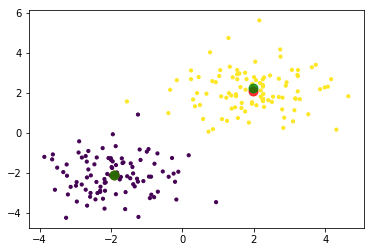

In [22]:
#Test

k=KMeans(n_clusters=2,max_iter=10,verbose=False)
k=KMeans(n_clusters=2,max_iter=10,verbose=True)
y_pred=k.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,s=10)
plt.scatter(k.centers[:,0],k.centers[:,1],c='red',s=80,alpha=0.8)

#打印离聚类中心最近的点（绿色）
representative_samples=X
plt.scatter(X[k.representative_samples][:,0],X[k.representative_samples][:,1],c='green',s=80,alpha=0.8)
plt.show()